In [331]:
%load_ext autoreload
%autoreload 2
%load_ext memory_profiler

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from exp.pm4py import *

In [203]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import networkx as nx
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'
from functools import partial,update_wrapper


# Base Petrinet

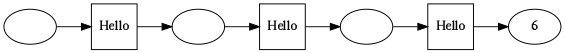

In [154]:
G = nx.DiGraph()
G.graph['rankdir'] = 'LR'
G.graph['dpi'] = 70
labels=['A','B','C','D','E','F']
for i in [0,2,4]:
    G.add_node(i,label=' ')
    G.add_node(i+1,label='Hello',shape='square')
    G.add_edge(i,i+1)
    G.add_edge(i+1,i+2)


draw(G)

In [157]:
trans=['T1','T2','T3','T4']
places=['P1','P2','P3','P4','P5','P6']

In [155]:
D_minus=np.array([
    [1,0, 0, 0, 0, 0],
    [0,1,  0,  0,  0,  0],
    [0,0,  1,  0,  0,  0],
    [0,0,  0,  1,  1,  0],
    
]);D_minus

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0]])

In [156]:


D_plus=np.array([
    [0,1,  1,  0,  0,  0],
    [0,0,  0,  1,  1,  0],
    [0,0,  0,  0,  1,  0],
    [0,0,  0,  0,  0,  1],
]);D_plus

array([[0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1]])

In [158]:
D=D_plus-D_minus
D

array([[-1,  1,  1,  0,  0,  0],
       [ 0, -1,  0,  1,  1,  0],
       [ 0,  0, -1,  0,  1,  0],
       [ 0,  0,  0, -1, -1,  1]])

In [159]:
def view(x=0):
    b=[1,0,0,0,0,0]

    if x!=0:
        for i in range(x):
            a=(b>=D_minus).all(axis=1)
            b=next_marking(a,b)
            
        tokens=list(b)
        for i in range(len(tokens)):
            if tokens[i]==0:
                tokens[i]=' '
        
    else:
        tokens=['1',' ',' ',' ',' ',' ']
       
    G = nx.DiGraph()
    G.graph['rankdir'] = 'LR'
    G.graph['dpi'] = 70
    print('M:',b)
    

    for i in range(len(trans)):
        G.add_node(trans[i],shape='square',style='filled',fillcolor='grey',label=trans[i])
    for i in range(len(places)):
        if i==0: G.add_node(places[i],label=tokens[i],style='filled',fillcolor='green')
        elif i==len(places)-1: G.add_node(places[i],label=tokens[i],style='filled',fillcolor='red')
        else: G.add_node(places[i],label=tokens[i])

    for i in range(len(trans)):
        for j in range(len(places)):
            #print(D_plus[i,j])
            if D_minus[i,j]==1:
                G.add_edge(places[j],trans[i])
            #print(D_plus[i,j])
            if D_plus[i,j]==1:
                G.add_edge(trans[i],places[j])


    return draw(G)

In [162]:
M=[1, 0, 0, 0, 0, 0]

In [163]:
(M>=D_minus).all(axis=1)

array([ True, False, False, False])

In [164]:
b = np.array([1, 0, 0, 0,0,0])



In [165]:
a=np.matmul(D_minus, b)
a=np.sign(a)

In [166]:
c=list(b)
for i in range(len(c)):
    if c[i]==0:
        c[i]=' '
c

[1, ' ', ' ', ' ', ' ', ' ']

In [167]:
def next_marking(a,b):
  
    x=np.matmul(a, D)+b
    return x
b

array([1, 0, 0, 0, 0, 0])

In [178]:
def animate():
    return interact(view,x=widgets.IntSlider(min=0, max=3, step=1, value=0))
animate()

interactive(children=(IntSlider(value=0, description='x', max=3), Output()), _dom_classes=('widget-interact',)…

<function __main__.view(x=0)>

In [227]:
class PetriNet:
    def __init__(self,P,T,I,O,m0):
        self.P,self.T,self.I,self.O,self.m0=np.array(P),np.array(T),np.array(I),np.array(O),np.array(m0)
        self.Ic=O-I
        self.reset()
    def view(self,x=0):
        
        G = nx.DiGraph()
        G.graph['rankdir'] = 'LR'
        G.graph['dpi'] = 70

        if x!=0:
            for i in range(x):
                self.transition()

    
        
    

        for i in range(len(self.T)):
            if self.T[i].startswith('_'):
                G.add_node(self.T[i],label=' ',shape='square',style='filled',fillcolor='black')
            else:
                G.add_node(self.T[i],shape='square',style='filled',fillcolor='grey',label=self.T[i])
        for i in range(len(self.P)):
            label=self.m[i] if self.m[i] else ' '
            if i==0: G.add_node(self.P[i],label=label,style='filled',fillcolor='green')
            elif i==len(self.P)-1: G.add_node(self.P[i],label=label,style='filled',fillcolor='red')
            else: G.add_node(self.P[i],label=label)

        for i in range(len(self.T)):
            for j in range(len(self.P)):
                #print(D_plus[i,j])
                if self.I[i,j]==1:
                    G.add_edge(self.P[j],self.T[i])
                #print(D_plus[i,j])
                if self.O[i,j]==1:
                    G.add_edge(self.T[i],self.P[j])

        return draw(G)
    
    def transition(self,event):
        print(self.T)
        t=self.T==event
        print(t)
        self.m=np.matmul(t, self.Ic)+self.m
        
    def reset(self):
        self.m=self.m0
    def _animate(self,trace,x=0):
        self.reset()
        event=0
        for i in range(x):
            event=trace.pop(0)
            self.transition(event)
        print(event)
        return self.view()
    
    def animate(self,trace):
        print(trace)
        return interact(self._animate,trace=fixed(trace),x=widgets.IntSlider(min=0, max=len(self.m0), step=1, value=0))

In [228]:
p=PetriNet(places,trans,D_minus,D_plus,[1,0,0,0,0,0])
p.animate(['T1','T2','T3','T4'])

['T1', 'T2', 'T3', 'T4']


interactive(children=(IntSlider(value=0, description='x', max=6), Output()), _dom_classes=('widget-interact',)…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [223]:
o=np.array(['T1', 'T2', 'T3', 'T4'])
o=='T1'

array([ True, False, False, False])

In [205]:
def test(a,b):
    print(a,b)
show_stats_plus_df = partial(test, a='test')
update_wrapper(show_stats_plus_df,test)


functools.partial(<function test at 0x7f0879211d40>, a='test')

In [207]:
interact(show_stats_plus_df,b=10)

ValueError: cannot find widget or abbreviation for argument: 'a'

# Create

# Import

# Export 

# View

In [ ]:
(('A','B','C'),('B','C')),(('A','B','C'),('B','C'))

In [126]:
s=['->A','A->B,C','B,C->D','B->E','D->E,F','E,F->I','C->_1,G','_1,G->H','H->F','I->']

def create(s):
    
    def t_in_trans(i,t,rel):
        res=False
        r=rel.split('->')[i]
        for j in r.split(','): 
            if j==t: res=True
        return res
        
    trans=set()
    for t in s:
        inp,out=t.split('->')
        for i in inp.split(','): trans.add(i)
        for i in out.split(','): trans.add(i)
    trans=list(trans)
    
    places=list(range(len(s)))
    trans.remove('')

    I=np.zeros(((len(trans),len(places))))
    O=np.zeros(((len(trans),len(places))))
    for p in range(len(places)):
        for t in range(len(trans)):
            if t_in_trans(0,trans[t],s[p]): O[t,p]+=1
            if t_in_trans(1,trans[t],s[p]): I[t,p]+=1
    m0=[0 for i in s]
    m0[0]=1
    return places,trans,I,O,m0

tu=create(s)

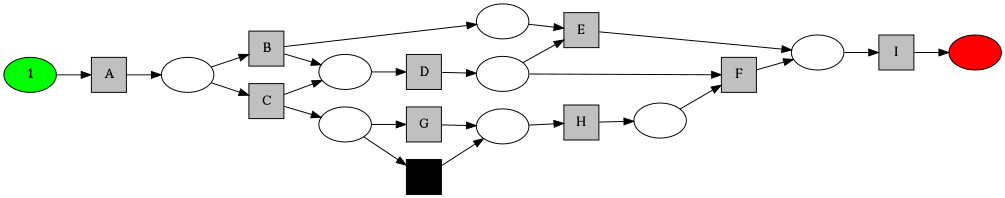

In [149]:
p=PetriNet(*tu)
p.view()


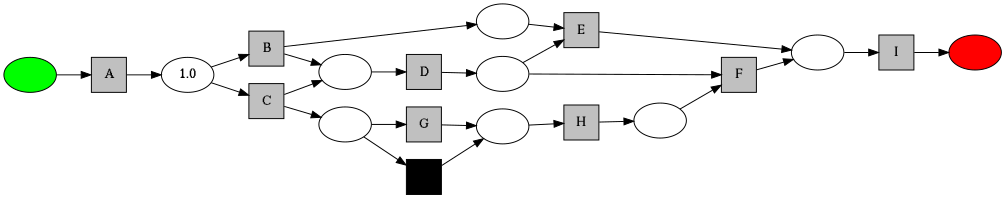

In [152]:
p.transition()
p.view()

In [151]:
p.I,p.O

(array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]

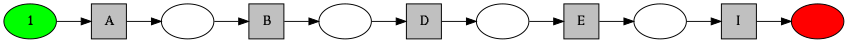

In [142]:
s=['->A','A->B','B->D','D->E','E->I','I->']
p=PetriNet(*create(s))
p.view()


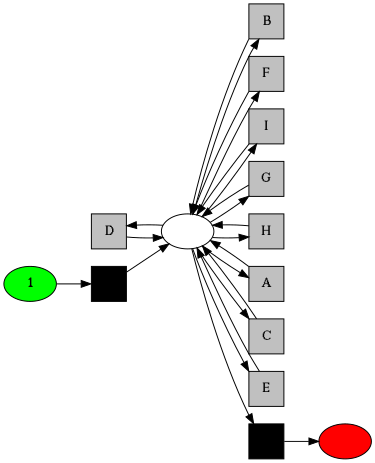

In [143]:
s=['->_1','_1,A,B,C,D,E,F,G,H,I->_2,A,B,C,D,E,F,G,H,I','_2->']
p=PetriNet(*create(s))
p.view()

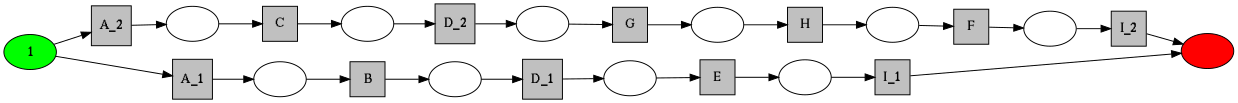

In [144]:
s=['->A_1,A_2','A_1->B','B->D_1','D_1->E','E->I_1','A_2->C','C->D_2','D_2->G','G->H','H->F','F->I_2','I_1,I_2->']
p=PetriNet(*create(s))
p.view()

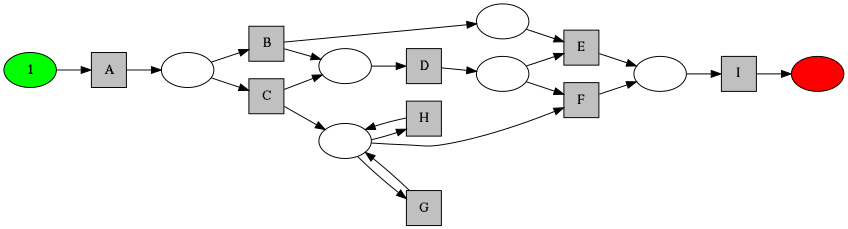

In [145]:
s=['->A','A->B,C','B,C->D','D->E,F','B->E','E,F->I','C,G,H->G,H,F','I->']
p=PetriNet(*create(s))
p.view()

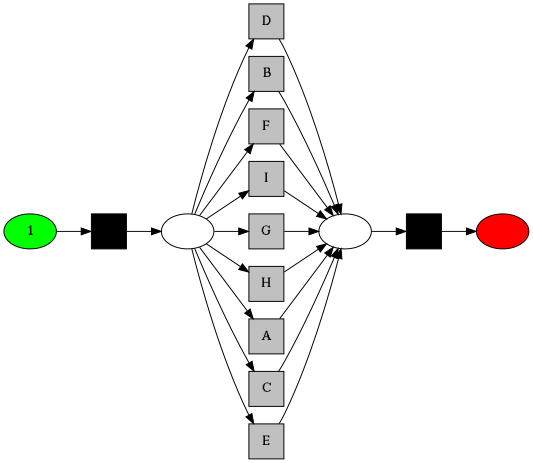

In [146]:
s=['->_1','_1->A,B,C,D,E,F,G,H,I','A,B,C,D,E,F,G,H,I->_2','_2->']
p=PetriNet(*create(s))
p.view()

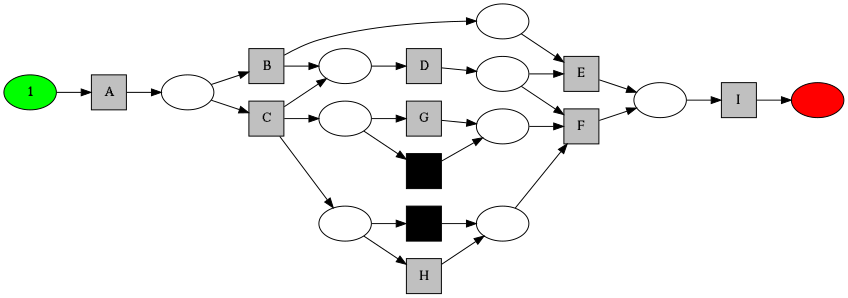

In [147]:
s=['->A','A->B,C','B,C->D','D->E,F','B->E','C->_1,G','_1,G->F','C->_2,H','_2,H->F','E,F->I','I->']
p=PetriNet(*create(s))
p.view()

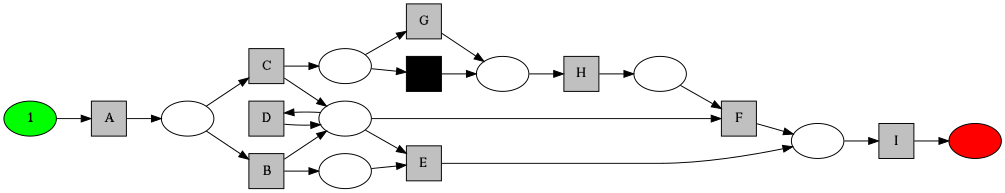

In [148]:
s=['->A','A->B,C','B,C,D->D,E,F','C->_1,G','_1,G->H','H->F','B->E','E,F->I','I->']
p=PetriNet(*create(s))
p.view()

[ True False False False]
[0 1 1 0 0 0]


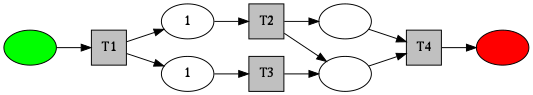

In [327]:
p.transition()
p.view()

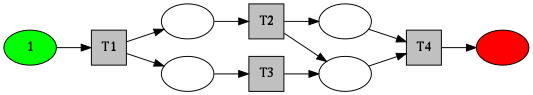

In [328]:
p.reset()
p.view()

In [329]:
! /home/lahann/anaconda3/envs/fastpm/bin/python notebook2script.py 05_fastpm_petrinet.ipynb

Converted 05_fastpm_petrinet.ipynb to exp/petrinet.py


In [350]:
%memit a=np.random.rand(100,300,300)

peak memory: 422.59 MiB, increment: 129.40 MiB


In [352]:
%memit sa=np.random.rand(100,300,300)

peak memory: 490.88 MiB, increment: 129.03 MiB


In [354]:
%memit sas,sa,a=0,0,0

peak memory: 293.18 MiB, increment: -206.00 MiB


In [12]:
# %matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 1,0,0))
output = interactive_plot.children[-1]
output.layout.height = '750px'
interactive_plot

ValueError: (-3, 3, 1, 0, 0) cannot be transformed to a widget